# Results of different #agent values

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
results = pd.read_csv('./robots_results.csv')
results = results.drop_duplicates(subset=['planner','damage'])
results = results.groupby(['planner','num_robots','num_agents'], as_index=False).mean()
results.head()

,planner,num_robots,num_agents,f,d,completion_time,planner_time,damage,num_disabled
0,Additive100StaticLackPlanner,2,300,2.0,5.0,296.067522,0.118917,74135.078967,56.400000
1,Additive100StaticLackPlanner,3,300,2.0,5.0,296.223145,0.150640,73985.727370,62.066667
2,Additive100StaticLackPlanner,4,300,2.0,5.0,296.392819,0.167260,73911.385692,60.653846
3,Additive100StaticLackPlanner,5,300,2.0,5.0,296.857280,0.251480,73980.441761,64.320000
4,Additive100StaticLackPlanner,6,300,2.0,5.0,296.793421,0.261196,73976.182072,60.428571


In [7]:
planners_names = ['IterativeAssignmentPlanner',
                  'KmeansAssignmentPlanner',
                  'StaticLineLackPlanner',
                  'SeparateStaticLackPlanner',
                  'Additive25StaticLackPlanner',
                  'Additive50StaticLackPlanner',
                  'Additive100StaticLackPlanner']

colors = ['tab:red','tab:brown','tab:blue','tab:green','navajowhite','burlywood','tab:orange']

planners_results = [results.loc[results['planner']==name] for name in planners_names]

## Settings

* the world is 100X300
* agents initialized in the bottom 100X100 square
* robots initialized somewhere under the world
* robots num is sufficient for full-blockage
* disablement range is 5
* agent speed v is 1
* robot speed fv is 2

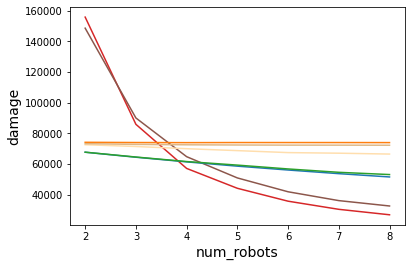

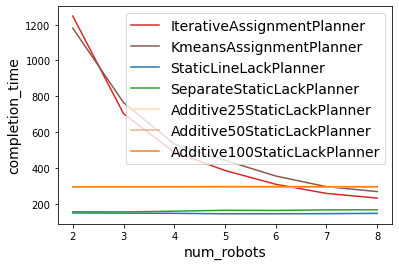

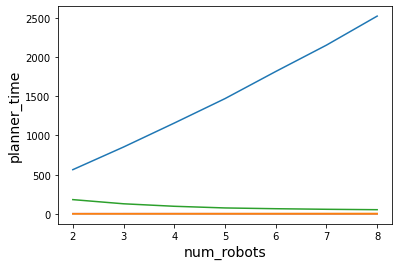

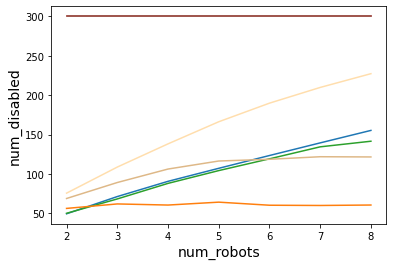

In [8]:
Y = ['damage', 'completion_time', 'planner_time', 'num_disabled']
X = ['num_robots' for y in Y]

for i in range(len(Y)):
    x = X[i]
    y = Y[i]

    plt.xlabel(x, fontsize=14)
    plt.ylabel(y, fontsize=14)

    for j in range(len(planners_results)):
        r = planners_results[j]
        plt.plot(list(r[x]),list(r[y]), c=colors[j])

    if i == 1:
        plt.legend(planners_names, fontsize='14')

    plt.savefig(f'./plots/{x}-{y}.png',bbox_inches='tight')
    plt.show()